<a href="https://colab.research.google.com/github/enino84/Data-Assimilation-2022/blob/main/DA_the_Lorenz_96_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy as sci
from sklearn.model_selection import train_test_split
import scipy as sci
import seaborn as sns

In [ ]:
def lorenz96(t, y):
  return [(y[np.mod(i+1,40)]-y[i-2])*y[i-1]-y[i]+8 for i in range(0,40)];

In [ ]:
np.random.seed(10);

t0 = 0;
tf = 10;
t = np.arange(t0, tf, 0.005);
sol = solve_ivp(lorenz96, [t0, tf], np.random.randn(40), t_eval=t);
y = sol.y;

y0 = y[:,-1];

sol = solve_ivp(lorenz96, [t0, tf], y0, t_eval=t);
y = sol.y;
xt = y;

In [ ]:
0.01*np.random.randn(y0.size)

array([ 0.00660232, -0.00350872, -0.00939433, -0.00489337, -0.00804591,
       -0.00212698, -0.0033914 ,  0.0031217 ,  0.00565153, -0.0014742 ,
       -0.00025905,  0.00289094, -0.00539879,  0.0070816 ,  0.00842225,
        0.00203581,  0.02394704,  0.00917459, -0.00112272, -0.0036218 ,
       -0.00232182, -0.00501729,  0.01128785, -0.0069781 , -0.00081122,
       -0.00529296,  0.01046183, -0.01418556, -0.00362499, -0.00121906,
        0.00319356,  0.00460903, -0.0021579 ,  0.00989072,  0.00314754,
        0.02467651, -0.01508321,  0.00620601, -0.01045133, -0.00798009])

In [ ]:
pool = 50;
solus = [];
solpl = [];
times = t.tolist()*pool;
for e in range(0, pool):
  sol = solve_ivp(lorenz96, [t0, tf], y0+0.01*np.random.randn(y0.size), t_eval=t);
  y = sol.y;
  solus.extend(y[0,:].tolist());
  solpl.append(y[0,:]);

times = np.array(times, dtype=np.float32);
solus = np.array(solus, dtype=np.float32);

In [ ]:
sns.set_style('darkgrid');

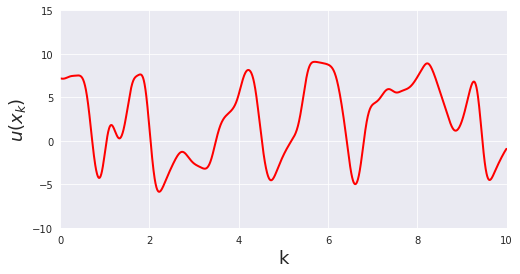

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t,xt[0,:],'-r',alpha=1,lw=2);
plt.xlabel('k', fontdict={'size':18});
plt.ylabel('$u(x_k)$', fontdict={'size':18});
plt.ylim([-10,15]);
plt.xlim([0,10]);

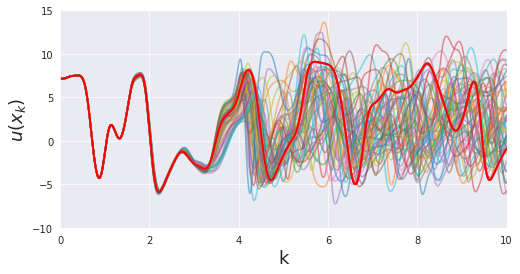

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(t,xt[0,:],'-r',alpha=1,lw=2);
for e in range(0, pool):
  plt.plot(t,solpl[e],alpha=.5);
plt.plot(t,xt[0,:],'-r',alpha=1,lw=2);
plt.xlabel('k', fontdict={'size':18});
plt.ylabel('$u(x_k)$', fontdict={'size':18});
plt.ylim([-10,15]);
plt.xlim([0,10]);

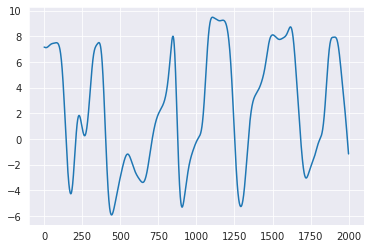

In [ ]:
plt.plot(y[0,:])

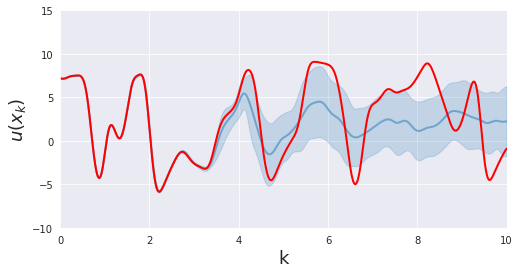

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=times,y=solus,linewidth = 2, alpha=.5, ci='sd');
sns.lineplot(x=t,y=xt[0,:],linewidth = 2, alpha=1, color='r');
plt.xlabel('k', fontdict={'size':18});
plt.ylabel('$u(x_k)$', fontdict={'size':18});
plt.ylim([-10,15]);
plt.xlim([0,10]);